<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [13]:
import os
import cv2
import scipy.io
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
#from skimage import data
from keras.models import Model
from keras import regularizers
from keras.layers import Dropout
#from skimage.color import rgb2gray
from keras.utils import plot_model
from keras.models import load_model
from keras.models import Sequential
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from os.path import dirname, join as pjoin
from keras.applications.mobilenet import MobileNet
from keras.layers import Input, Lambda, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input

In [2]:
import sys


In [3]:
seedlings = glob('C:/Users/harit/Desktop/jmd/Train/*')
seedlings

['C:/Users/harit/Desktop/jmd/Train\\drowsy',
 'C:/Users/harit/Desktop/jmd/Train\\vigilant']

In [4]:
len(seedlings)

2

In [5]:
data_set = 'C:/Users/harit/Desktop/jmd'

In [6]:
labels = os.listdir(data_set)
print("Number of Labels:", len(labels))

Number of Labels: 2


In [7]:
total = 0
for lb in os.scandir(data_set):
    print('folder: {} images: {}'.format(lb.name, len(os.listdir(lb))))
    total += len(os.listdir(lb))
print('Total images:', total)


folder: Test images: 2
folder: Train images: 2
Total images: 4


In [8]:
data_set_train = 'C:/Users/harit/Desktop/jmd/Train'

labels = os.listdir(data_set_train)
print("Number of Labels:", len(labels))

total = 0
for lb in os.scandir(data_set_train):
    print('folder: {} images: {}'.format(lb.name, len(os.listdir(lb))))
    total += len(os.listdir(lb))
print('Total images:', total)


Number of Labels: 2
folder: drowsy images: 47340
folder: vigilant images: 42731
Total images: 90071


In [9]:
data_set_test = 'C:/Users/harit/Desktop/jmd/Test'

labels = os.listdir(data_set_test)
print("Number of Labels:", len(labels))

total = 0
for lb in os.scandir(data_set_test):
    print('folder: {} images: {}'.format(lb.name, len(os.listdir(lb))))
    total += len(os.listdir(lb))
print('Total images:', total)

Number of Labels: 2
folder: drowsy images: 10405
folder: vigilant images: 9193
Total images: 19598


In [10]:
#Storing the Train path of the dataset

data_dir = 'C:/Users/harit/Desktop/jmd/Train/'

In [14]:
#We are merging the images in all the 2 classes and storing in the new directory

for f in data_dir:
    new_dir = pjoin(data_dir + f)


In [15]:
new_dir

'C:/Users/harit/Desktop/jmd/Train//'

In [16]:
len(new_dir)

34

In [17]:
dir = glob('C:/Users/harit/Desktop/jmd/Train/*/*.jpg')

In [18]:
len(dir)


90071

In [19]:
dir[1]


'C:/Users/harit/Desktop/jmd/Train\\drowsy\\drowsy1.jpg'

In [20]:
IMAGE_SIZE = [224, 224]

train_path = 'C:/Users/harit/Desktop/jmd/Train'
valid_path = 'C:/Users/harit/Desktop/jmd/Test'

# adding the preprocessing layer to the very first layer of MobileNet Model
den = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Don't train existing weights
for layer in den.layers:
    layer.trainable = False


In [21]:
# Base layer of the Model
x = Flatten()(den.output)
prediction = Dense(len(seedlings), activation='softmax',  kernel_regularizer=regularizers.l2(0.0001))(x)  
#Using L2 regularizer to avoid overfitting.


In [22]:
# create a model object
model = Model(inputs=den.input, outputs=prediction)

# view the structure of the model
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [23]:
# Compiling the model with cost and optimization method
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [24]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/harit/Desktop/jmd/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:/Users/harit/Desktop/jmd/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 90071 images belonging to 2 classes.
Found 19598 images belonging to 2 classes.


In [25]:
len(training_set)


2815

In [26]:
result = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=3,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))


Epoch 1/3
2815/2815 [==============================] - 6735s 2s/step - loss: 0.0337 - accuracy: 0.9978 - val_loss: 0.0062 - val_accuracy: 0.9813
Epoch 2/3
2815/2815 [==============================] - 6575s 2s/step - loss: 0.0244 - accuracy: 0.9995 - val_loss: 2.6533 - val_accuracy: 0.9002
Epoch 3/3
2815/2815 [==============================] - 6630s 2s/step - loss: 0.0333 - accuracy: 0.9996 - val_loss: 0.4302 - val_accuracy: 0.9183


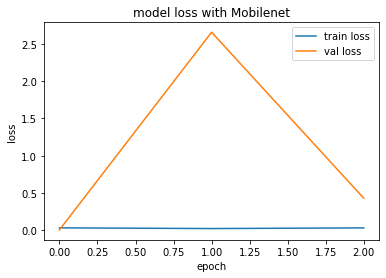

<Figure size 432x288 with 0 Axes>

In [27]:
# loss
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.title('model loss with Mobilenet')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.savefig('LossVal_loss')


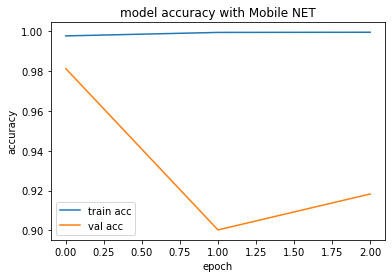

<Figure size 432x288 with 0 Axes>

In [28]:
# Accuracies
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.title('model accuracy with Mobile NET')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
